## Problem Statement<br>
As the world shifts toward using sustainable energy, particularly solar power, efficiently managing energy output based on weather conditions becomes important. being able to predict accurately given the hight variability of solar energy production due to changing weather conditions leads companies to better resource management and operational planning, further reducing dependency on non-renewable energy sources.<br>
Accurate forecasts allow for better energy storage management, preventing overproduction and underproduction while enhancing grid reliability (Sahin, 2020). Predictive models enable energy companies to plan for energy needs more effectively, reducing costs related to energy storage, grid management, and backup energy sources (Hong, Pinson, & Fan, 2016). As the transition to renewable energy accelerates, accurate forecasting becomes increasingly important in reducing reliance on fossil fuels and maximizing the use of renewable energy sources (IEA, 2020).<br>
Our company wants to forecast how much solar energy will be produced based on historical weather conditions such as solar radiation, temperature, cloud cover. the dataset for my project consist of historical weather data and energy generation information recorded at 15-minute intervals.<br>
https://www.kaggle.com/datasets/sheemazain/renewable-power-generation-weather-condition-2024<br>
The dataset consists of 196,776 rows and 17 columns. It contains hourly records of solar energy generation and various weather metrics. The key columns are:<br>
- Energy delta[Wh]: The solar energy generated (target variable)<br>
- GHI: Global Horizontal Irradiance (solar radiation)<br>
- temp: Temperature in degrees Celsius<br>
- clouds_all: Cloud coverage percentage<br>
- wind_speed: Wind speed in m/s<br>
- rain_1h and snow_1h: Rain and snow precipitation in the last hour (in mm)<br>
- sunlightTime and dayLength: Time of sunlight and total day length in seconds Other features such as `hour` and `month` can help analyze temporal trends<br>
These features will be used to train machine learning models that can predict future solar energy production, aiding in decision-making and planning for the company.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset
df=pd.read_csv("D://classes/ai/pr/fdata/archive/Renewable.csv")
df.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


In [3]:
print("Dataset Shape:",df.shape)
print("column Data Types:\n",df.info())

Dataset Shape: (196776, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    196776 non-null  object 
 1   Energy delta[Wh]        196776 non-null  int64  
 2   GHI                     196776 non-null  float64
 3   temp                    196776 non-null  float64
 4   pressure                196776 non-null  int64  
 5   humidity                196776 non-null  int64  
 6   wind_speed              196776 non-null  float64
 7   rain_1h                 196776 non-null  float64
 8   snow_1h                 196776 non-null  float64
 9   clouds_all              196776 non-null  int64  
 10  isSun                   196776 non-null  int64  
 11  sunlightTime            196776 non-null  int64  
 12  dayLength               196776 non-null  int64  
 13  SunlightTime/daylength  196776 non-null  float

My dataset consists of 196776 rows and 17 columns. All columns are either of integer or float data types, except for the 'Time' column, which is currently of type object. I will change the 'Time' column to datetime format.

In [4]:
#Converting "Time" column to datetime since its object, and then setting this column as index

df["Time"]=pd.to_datetime(df["Time"])
df.set_index("Time",inplace=True)

#Converting "hour" and "month" to category
df["hour"]=df["hour"].astype("category")
df["month"]=df["month"].astype("category")

In [5]:
#Checking for missing values
df.isnull().sum()

Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
weather_type              0
hour                      0
month                     0
dtype: int64

In [6]:
#Summary statistics
df.describe()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type
count,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000
mean,573.008228,32.596538,9.790521,1015.292780,79.810566,3.937746,0.066035,0.007148,65.974387,0.519962,211.721094,748.644347,0.265187,3.198398
std,1044.824047,52.172018,7.995428,9.585773,15.604459,1.821694,0.278913,0.069710,36.628593,0.499603,273.902186,194.870208,0.329023,1.289939
min,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,1.000000
25%,0.000000,0.000000,3.600000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,0.000000,0.000000,570.000000,0.000000,2.000000
50%,0.000000,1.600000,9.300000,1016.000000,84.000000,3.700000,0.000000,0.000000,82.000000,1.000000,30.000000,765.000000,0.050000,4.000000
75%,577.000000,46.800000,15.700000,1021.000000,92.000000,5.000000,0.000000,0.000000,100.000000,1.000000,390.000000,930.000000,0.530000,4.000000
max,5020.000000,229.200000,35.800000,1047.000000,100.000000,14.300000,8.090000,2.820000,100.000000,1.000000,1020.000000,1020.000000,1.000000,5.000000


- high standard deviation for GHI (51.89, which is greater than the mean (32.58)) suggests significant fluctuations in solar irradiance, which is expected due to its dependence on time and weather conditions.
- temperature ranges from -16.6°C to 35.8°C, indicating diverse weather conditions, also the median temperature (9.4°C) is close to the mean (9.79°C) suggesting a somewhat balanced distribution.
- Both rain and snow averages are close to zero,However rain can reach up to 8.09 mm in one hour, and snow up to 2.82 mm, which could be significant for short periods.
- isSun With a mean of 0.524, indicates that sunlight is present roughly half of the time
- SunlightTime/Daylength has a mean of 0.265 suggesting that on average about a quarter of the day length has effective sunlight time.

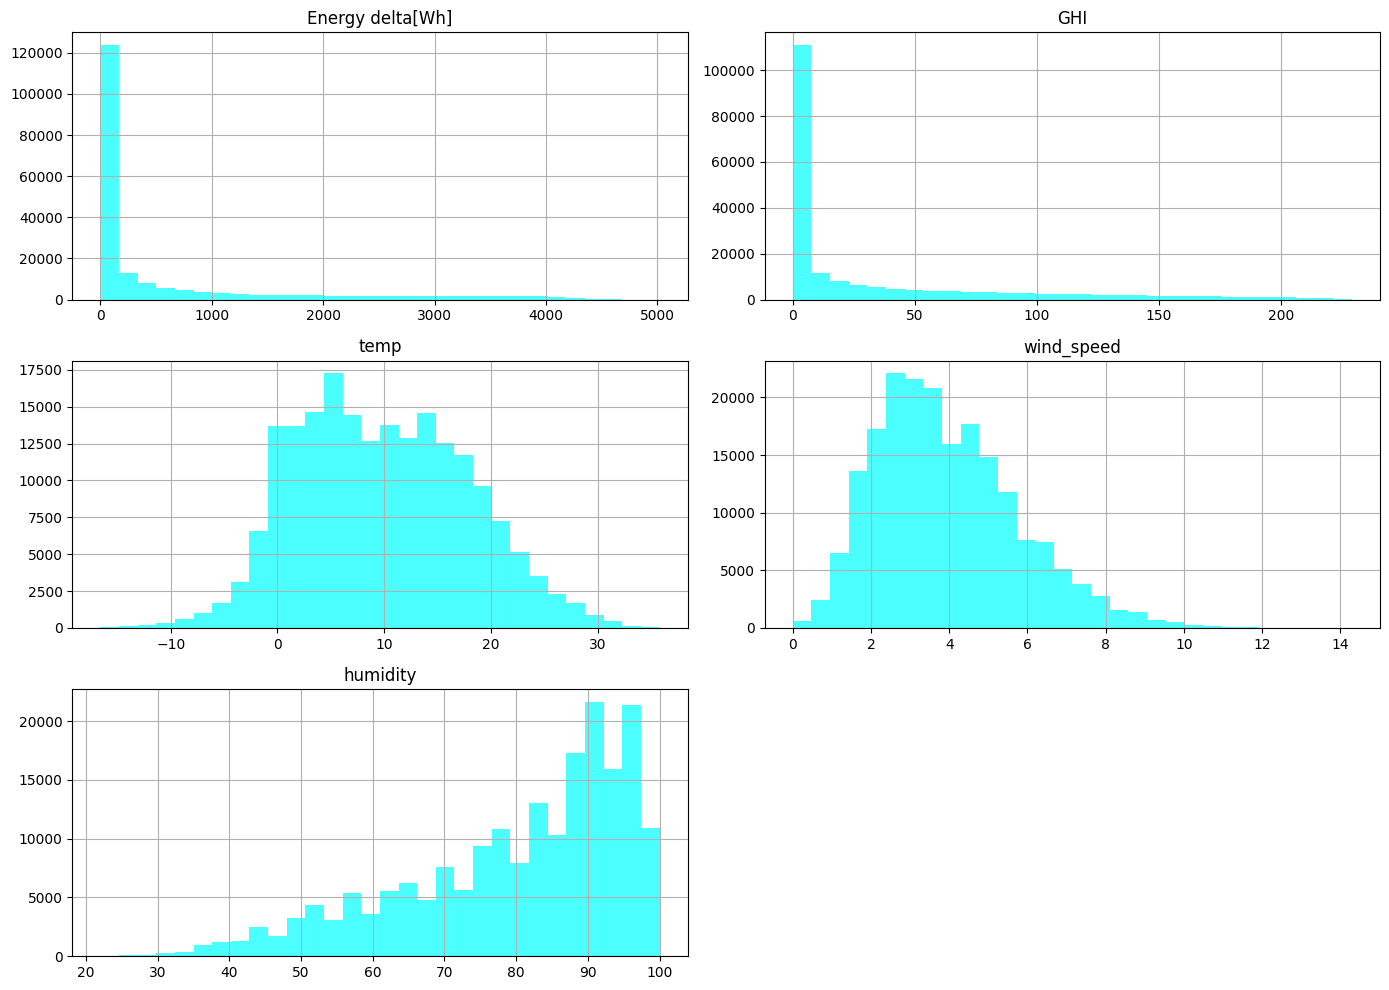

In [7]:
#Distribution visualizing for key columns
columns_to_plot=["Energy delta[Wh]","GHI","temp","wind_speed","humidity"]
df[columns_to_plot].hist(bins=30, figsize=(14, 10), color='cyan', alpha=0.7)
plt.tight_layout()
plt.show()

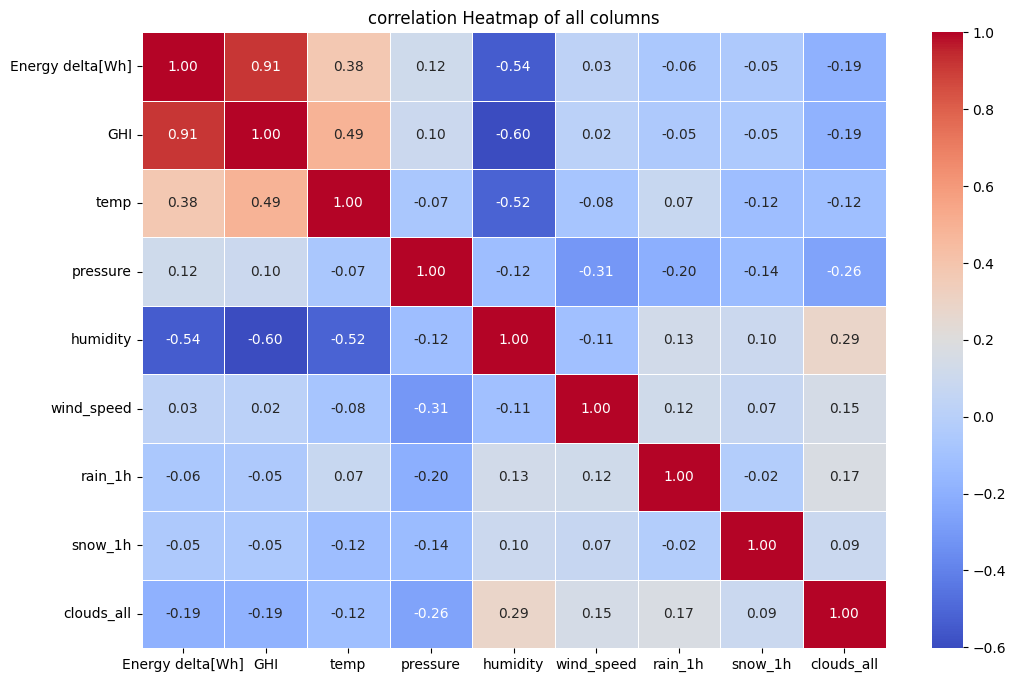

In [31]:
#Correlation between main features
selected_columns=["Energy delta[Wh]","GHI","temp","pressure","humidity","wind_speed","rain_1h","snow_1h","clouds_all"]
correlation_matrix=df[selected_columns].corr()
#Visualizing
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5)
plt.title("correlation Heatmap of all columns")
plt.show()

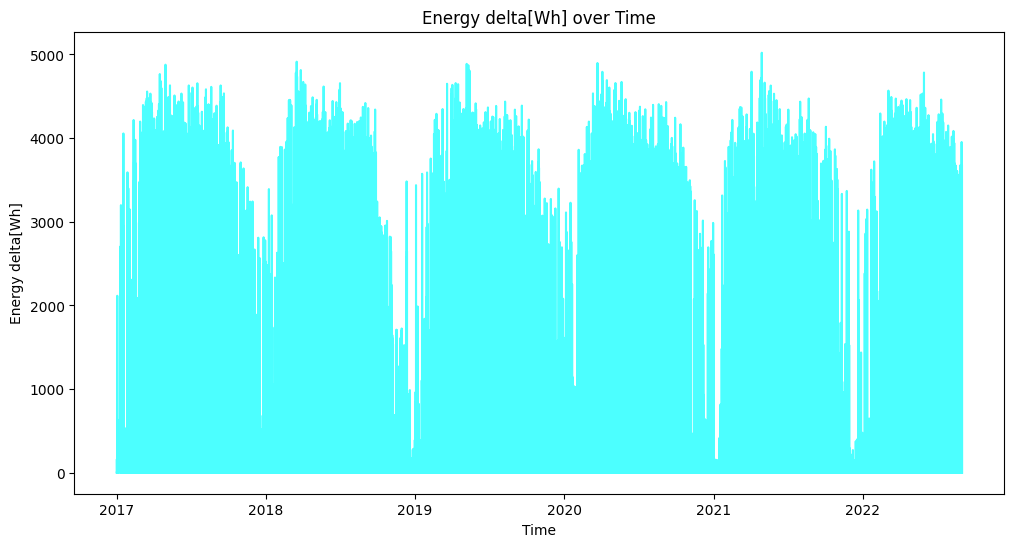

In [9]:
#Visualizing Energy production over time

plt.figure(figsize=(12, 6))
plt.plot(df.index,df["Energy delta[Wh]"],color="cyan",alpha=0.7)
plt.title("Energy delta[Wh] over Time")
plt.xlabel("Time")
plt.ylabel("Energy delta[Wh]")
plt.show()

C:\Users\nima_\AppData\Local\Temp\ipykernel_13940\3352428440.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_energy=df.groupby("hour")["Energy delta[Wh]"].mean()


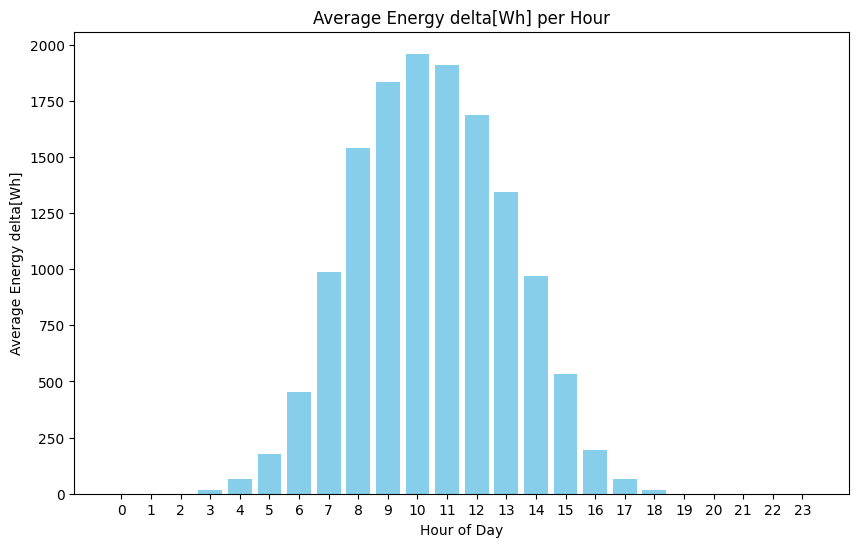

In [10]:
#Grouping data by "hour" column and calculating the mean of "Energy delta[Wh]"
hourly_energy=df.groupby("hour")["Energy delta[Wh]"].mean()

#Ploting the results
plt.figure(figsize=(10, 6))
plt.bar(hourly_energy.index,hourly_energy.values,color="skyblue")
plt.title("Average Energy delta[Wh] per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Energy delta[Wh]")
plt.xticks(range(24))  # Ensuring that all hours (0-23) are displayed on x-axis
plt.show()

In [11]:
#Feature Scaling for standardizing numerical features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
numerical_features=["GHI","temp","pressure","humidity","wind_speed","rain_1h","snow_1h","clouds_all","sunlightTime","dayLength","SunlightTime/daylength"]
#Fitting and transforming numerical features
df[numerical_features]=scaler.fit_transform(df[numerical_features])

In [12]:
#Train and test split
from sklearn.model_selection import train_test_split

X=df.drop(columns="Energy delta[Wh]")
y=df["Energy delta[Wh]"]

#splitting data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

### Model Training<br>
Based on our problem and the dataset, since my task is to predict Energy delta[Wh] (target variable), i will use linear regression, knn, svm, decision tree and random forest for prediction and then evaluating each model to see which one offers the best performance for my dataset. the reason i can not implement logistic regression model is it used for binary classification and naive bayes used for classification tasks not regression.
i will first start by training Linear Regression model which assumes a linear relationship between features and the target variable and its easy to implement but may not capture complex relationships.

In [34]:
#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
linearregression_model=LinearRegression()
#training the model on training data
linearregression_model.fit(X_train,y_train)
#making predictions on tst data
y_pred_linearregression=linearregression_model.predict(X_test)

#Evaluating the model
mse_linearregression=mean_squared_error(y_test,y_pred_linearregression)
r2_linearregression=r2_score(y_test,y_pred_linearregression)

print("Target variable range:")
print("Min:",df['Energy delta[Wh]'].min())
print("Max:",df['Energy delta[Wh]'].max())

print(f"Linear Regression Mean Squared Error: {mse_linearregression:.3f}")
print(f"Linear Regression R^2 Score: {r2_linearregression:.3f}")

rmse_linearregression = np.sqrt(mse_linearregression)
print(f"Linear Regression Root Mean Squared Error: {rmse_linearregression:.3f}")

Target variable range:
Min: 0
Max: 5020
Linear Regression Mean Squared Error: 158683.759
Linear Regression R^2 Score: 0.856
Linear Regression Root Mean Squared Error: 398.351


since the target variable(Energy delta(Wh)) ranges from 0 to 5020, MSE suggests that there are significant errors in the predictions. An RMSE of approximately 398.35 indicates that the average deviation between the predicted and actual values is around 398.35 units
the MSE suggests that there are considerable prediction errors, as in the RMSE possibly due to its inability to handle nonlinear relationships in the data. but the R^2 score indicates that 85.6% of the variance in the target variable is explained by the model. overall linear regression showed a moderate fit to data.

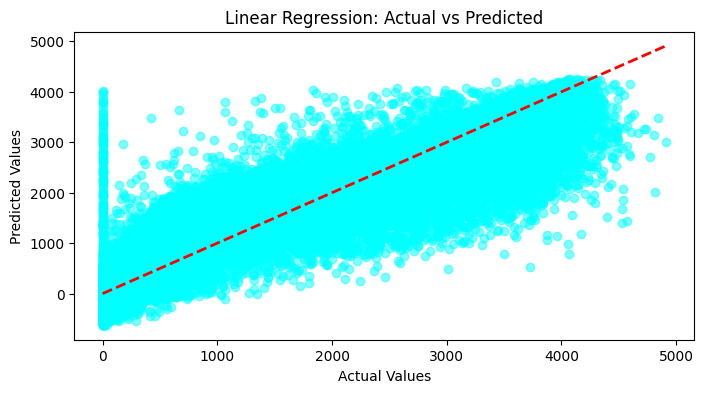

In [14]:
#visualizing
plt.figure(figsize=(8, 4))
plt.scatter(y_test,y_pred_linearregression,alpha=0.5,color='cyan')
plt.plot([y_test.min(),y_test.max()],[y_test.min(), y_test.max()],"r--", lw=2)
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

The next model im going to use is K nearest neighbors which predicts the target variable based on the average of the nearest neighbors.

In [35]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn_model=KNeighborsRegressor(n_neighbors=5) #default parameter
#training on train data
knn_model.fit(X_train,y_train)
#prediction on test data
y_pred_knn=knn_model.predict(X_test)

#Evaluating the model
mse_knn=mean_squared_error(y_test,y_pred_knn)
r2_knn=r2_score(y_test,y_pred_knn)
print(f"KNN Mean Squared Error: {mse_knn:.3f}")
print(f"KNN R^2 Score: {r2_knn:.3f}")
rmse_knn=np.sqrt(mse_knn)
print(f"KNN Root Mean Squared Error: {rmse_knn:.3f}")

KNN Mean Squared Error: 95201.399
KNN R^2 Score: 0.913
KNN Root Mean Squared Error: 308.547


The MSE for KNN model is lower compared to the linear regression MSE, indicating that the KNN model makes more accurate predictions on average. The R^2 score indicates that KNN explains 91.3% of the variance in the data, which is higher than linear regression’s 85.6% and the RMSE of 308.55 shows that the average prediction error is smaller than in linear regression (398.35) indicating more precise predictions.

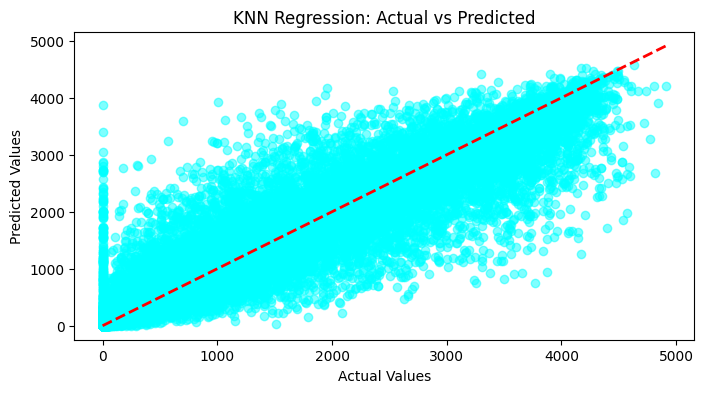

In [16]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test,y_pred_knn,alpha=0.5,color="cyan")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],"r--", lw=2)
plt.title("KNN Regression: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [38]:
#Tuning hyperparameter
k_values=[3,5,7,10]
knn_r2_values=[]
for k in k_values:    
    knn_tuned_model=KNeighborsRegressor(n_neighbors=k)
    knn_tuned_model.fit(X_train,y_train)
    y_pred_knn_tuned=knn_tuned_model.predict(X_test)
    
    mse_knn_tuned=mean_squared_error(y_test,y_pred_knn_tuned)
    r2_knn_tuned=r2_score(y_test,y_pred_knn_tuned)
    rmse_knn_tuned=np.sqrt(mse_knn_tuned)
    print(f"KNN with {k} neighbors - Mean Squared Error:{mse_knn_tuned:.3f}, R^2 score: {r2_knn_tuned:.3f}, Root Mean Squared Error: {rmse_knn_tuned:.3f}")
    knn_mse_values.append(mse_knn_tuned)
    knn_rmse_values.append(rmse_knn_tuned)
    knn_r2_values.append(r2_knn_tuned)

KNN with 3 neighbors - Mean Squared Error:93761.940, R^2 score: 0.915, Root Mean Squared Error: 306.206
KNN with 5 neighbors - Mean Squared Error:95201.399, R^2 score: 0.913, Root Mean Squared Error: 308.547
KNN with 7 neighbors - Mean Squared Error:98129.581, R^2 score: 0.911, Root Mean Squared Error: 313.256
KNN with 10 neighbors - Mean Squared Error:99259.579, R^2 score: 0.910, Root Mean Squared Error: 315.055


Tuning improved the results slightly. knn with 3 neighbors showing lower mse and rmse and higher R^2 score. results showing that by increasing the number of neighbors, mse and rmse increases and R^2 score decreases.

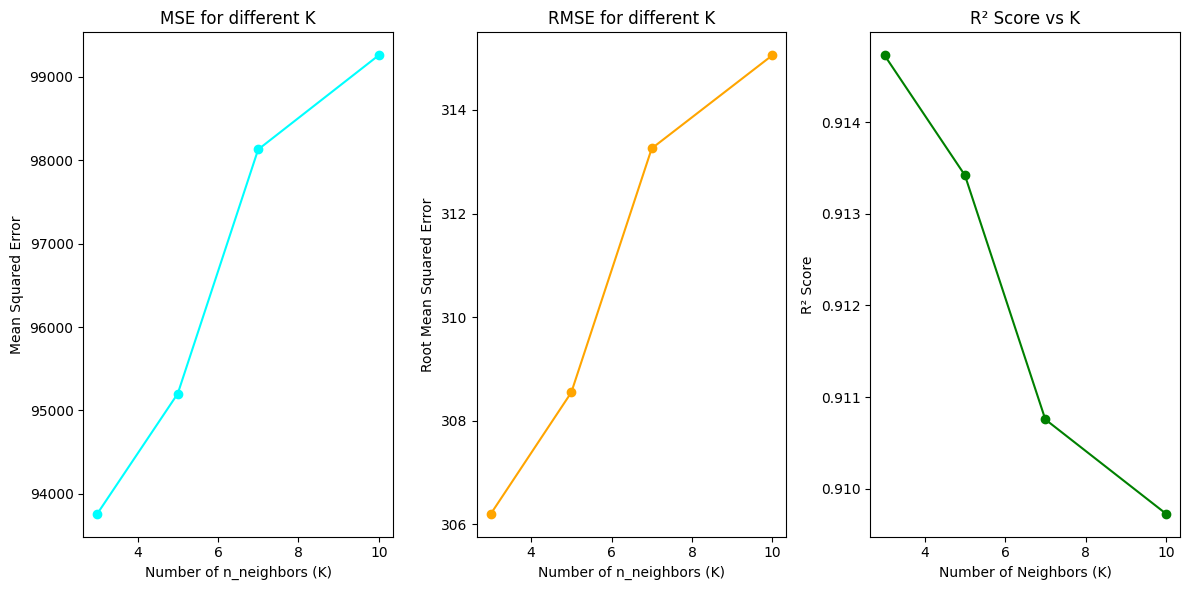

In [20]:
#Ploting MSE, RMSE and R^2

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.plot(k_values,knn_mse_values,marker="o",color="cyan")
plt.title("MSE for different K")
plt.xlabel("Number of n_neighbors (K)")
plt.ylabel("Mean Squared Error")
plt.subplot(1,3,2)
plt.plot(k_values,knn_rmse_values,marker="o",color="orange")
plt.title("RMSE for different K")
plt.xlabel("Number of n_neighbors (K)")
plt.ylabel("Root Mean Squared Error")
plt.subplot(1,3,3)
plt.plot(k_values,knn_r2_values,marker="o",color="green")
plt.title("R² Score vs K")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("R² Score")
plt.tight_layout()
plt.show()

KNN with 3 neighbors provides the best performance, with the lowest MSE and RMSE, and the highest R² score, indicating it makes the most accurate predictions. therefore it seems like that increasing the number of neighbors reduces the models performance.

Next i tried to model SVM but i could not execute the cell and the computation time was very high. i searched for the reason and find out that it might be due to the large number of samples in the dataset (196,776). therefore i decided to reduce my dataset size by  using a small sample of it.

In [39]:
from sklearn.svm import SVR

#Sampling a smaller dataset
sample_data=df.sample(n=10000,random_state=10)
X_sample=sample_data.drop(columns=["Energy delta[Wh]"])
y_sample=sample_data["Energy delta[Wh]"]
X_train_sample,X_test_sample,y_train_sample,y_test_sample=train_test_split(X_sample,y_sample,test_size=0.3,random_state=10)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_sample)
X_test_scaled=scaler.transform(X_test_sample)

svm_model=SVR(kernel="rbf",C=1.0)
svm_model.fit(X_train_scaled,y_train_sample)
y_pred_svm=svm_model.predict(X_test_scaled)

mse_svm=mean_squared_error(y_test_sample,y_pred_svm)
rmse_svm=np.sqrt(mse_svm)
r2_svm=r2_score(y_test_sample,y_pred_svm)
print(f"SVm Mean Squared Error: {mse_svm:.3f}")
print(f"SVM Root Mean Squared Error: {rmse_svm:.3f}")
print(f"SVM R^2 Score: {r2_svm:.3f}")

SVm Mean Squared Error: 927143.511
SVM Root Mean Squared Error: 962.883
SVM R^2 Score: 0.149


The high MSE and RMSE values, and very low R² score, indicate that the SVM model predictions are not accurate and do not generalize well to this dataset. next i will use GridsearchCV for hyperparameter tuning which automates the process of trying different hyperparameter combinations and evaluates each one using cross-validation.

In [40]:
from sklearn.model_selection import GridSearchCV

#defining parameters for grid
parameter_grid={
    "C":[0.1,1,10],
    "gamma":[1,0.1,0.01],
    "kernel":["rbf"]
}
tuned_svm=SVR()
grid_search=GridSearchCV(tuned_svm,parameter_grid,cv=5,scoring="neg_mean_squared_error",verbose=1)
grid_search.fit(X_train_scaled,y_train_sample)
best_svm=grid_search.best_estimator_

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

#predicting using best model 
y_pred_best_svm=best_svm.predict(X_test_scaled)

mse_best_svm=mean_squared_error(y_test_sample,y_pred_best_svm)
rmse_best_svm=np.sqrt(mse_best_svm)
r2_best_svm=r2_score(y_test_sample,y_pred_best_svm)
print(f"SVM Optimized Mean Squared Error: {mse_best_svm:.3f}")
print(f"SVM optimized Root mean squared error: {rmse_best_svm:.3f}")
print(f"SVM optimized R^2 score: {r2_best_svm:.3f}")


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score: -354426.55705182836
SVM Optimized Mean Squared Error: 327718.769
SVM optimized Root mean squared error: 572.467
SVM optimized R^2 score: 0.699


The optimized SVM model shows better performance than the initial SVM but the model still have weaker performance compared to other models.
in the next step i will model decision tree which splits the data into branches based on feature values to make predictions.

In [41]:
#Decision Tree 

from sklearn.tree import DecisionTreeRegressor
decisiontree_model=DecisionTreeRegressor(random_state=10)
decisiontree_model.fit(X_train,y_train)
y_pred_decisiontree=decisiontree_model.predict(X_test)

mse_decisiontree=mean_squared_error(y_test,y_pred_decisiontree)
rmse_decisiontree=np.sqrt(mse_decisiontree)
r2_decisiontree=r2_score(y_test,y_pred_decisiontree)
print(f"Decision Tree Mean Squared Error: {mse_decisiontree:.3f}")
print(f"Decision Tree Root Mean Squared Error: {rmse_decisiontree:.3f}")
print(f"Decision Tree R^2 Score: {r2_decisiontree:.3f}")

Decision Tree Mean Squared Error: 145957.799
Decision Tree Root Mean Squared Error: 382.044
Decision Tree R^2 Score: 0.867


The Decision Tree model has shown a good level of accuracy and fit to the data. However, the RMSE indicates there are still notable deviations between predicted and actual values.

In [43]:
#Hyperparameter tuning
decisiontree_depth_values=[5,10,15,20]
decisiontree_tuning_results=[]
for depth in decisiontree_depth_values:
    decisiontree_tuned_model=DecisionTreeRegressor(max_depth=depth,random_state=10)
    decisiontree_tuned_model.fit(X_train,y_train)
    y_pred_decisiontree_tuned=decisiontree_tuned_model.predict(X_test)
    mse_decisiontree_tuned=mean_squared_error(y_test,y_pred_decisiontree_tuned)
    rmse_decisiontree_tuned=np.sqrt(mse_decisiontree_tuned)
    r2_decisiontree_tuned=r2_score(y_test,y_pred_decisiontree_tuned)
    #print(f"Decision Tree with max_depth={depth} - Mean Squared Error: {mse_decisiontree_tuned}, Root Mean Squared Error: {rmse_decisiontree_tuned}, R^2 Score: {r2_decisiontree_tuned}")
    decisiontree_tuning_results.append((depth,mse_decisiontree_tuned,rmse_decisiontree_tuned,r2_decisiontree_tuned))
    
tuned_dt_columns=["max_depth","MSE","RMSE","R^2 Score"]
tuned_dt_results_df=pd.DataFrame(decisiontree_tuning_results,columns=tuned_dt_columns)
tuned_dt_results_df=tuned_dt_results_df.round(3)
print(tuned_dt_results_df)

   max_depth         MSE     RMSE  R^2 Score
0          5  119647.231  345.901      0.891
1         10   91149.726  301.910      0.917
2         15  115573.563  339.961      0.895
3         20  136067.938  368.874      0.876


The tuned model with a max depth of 10 performed the best However increasing depth greater than 10 resulted in overfitting, as showed by a decrease in R² score and an increase in MSE.

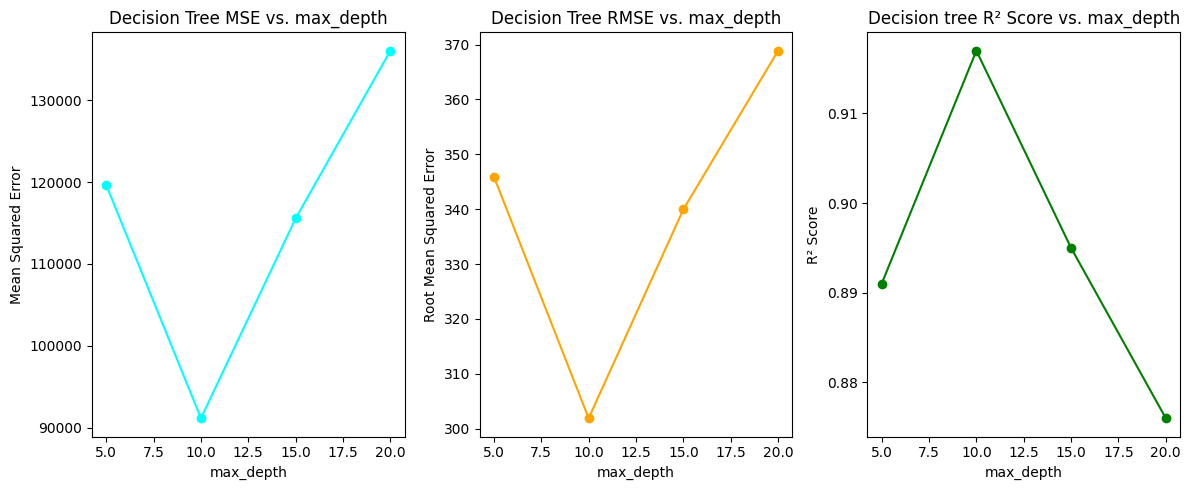

In [44]:
# visualizing 

mse_decisiontree_values=tuned_dt_results_df["MSE"]
rmse_decisiontree_values=tuned_dt_results_df["RMSE"]
r2_decisiontree_values=tuned_dt_results_df["R^2 Score"]


plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.plot(decisiontree_depth_values,mse_decisiontree_values,marker="o",color="cyan")
plt.title("Decision Tree MSE vs. max_depth")
plt.xlabel("max_depth")
plt.ylabel("Mean Squared Error")

plt.subplot(1,3,2)
plt.plot(decisiontree_depth_values,rmse_decisiontree_values,marker="o",color="orange")
plt.title("Decision Tree RMSE vs. max_depth")
plt.xlabel("max_depth")
plt.ylabel("Root Mean Squared Error")

plt.subplot(1,3,3)
plt.plot(decisiontree_depth_values,r2_decisiontree_values,marker="o",color="green")
plt.title("Decision tree R² Score vs. max_depth")
plt.xlabel("max_depth")
plt.ylabel("R² Score")

plt.tight_layout()
plt.show()

In [33]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

randomforest_model=RandomForestRegressor(n_estimators=100,random_state=10)  #using 100 trees
randomforest_model.fit(X_train,y_train)
y_pred_randomforest=randomforest_model.predict(X_test)

mse_randomforest=mean_squared_error(y_test,y_pred_randomforest)
rmse_randomforest=np.sqrt(mse_randomforest)
r2_randomforest=r2_score(y_test,y_pred_randomforest)
print(f"Random Forest Mean Squared Error: {mse_randomforest:.3f}")
print(f"Random Forest Root Mean Squared Error: {rmse_randomforest:.3f}")
print(f"Random Forest R^2 Score: {r2_randomforest:.3f}")


Random Forest Mean Squared Error: 71625.136
Random Forest Root Mean Squared Error: 267.629
Random Forest R^2 Score: 0.935


Random Forest which is an ensemble method aggregates the results of multiple decision trees to reduce overfitting. this model provided the best performance among all models with the highest R² score and lowest RMSE. This indicates it effectively captured the relationships between features and the target variable.

In [42]:
#Hyperparameter tuning
rf_n_estimators_values=[50,100,200]
rf_max_depth_values=[10,15,20]

rf_tuning_results=[]

for n_estimators in rf_n_estimators_values:
    for max_depth in rf_max_depth_values:
        rf_tuned_model=RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,random_state=10)
        rf_tuned_model.fit(X_train,y_train)
        y_pred_rf_tuned=rf_tuned_model.predict(X_test)
        
        mse_rf_tuned=mean_squared_error(y_test,y_pred_rf_tuned)
        rmse_rf_tuned=np.sqrt(mse_rf_tuned)
        r2_rf_tuned=r2_score(y_test,y_pred_rf_tuned)
        
        rf_tuning_results.append((n_estimators,max_depth,mse_rf_tuned,rmse_rf_tuned,r2_rf_tuned))
        #print(f"Random Forest with n_estimators={n_estimators} and max_depth={max_depth} - Mean Squared Error:{mse_rf_tuned:.3f}, Root Mean Squared Error:{rmse_rf_tuned:.3f}, R^2 Score: {r2_rf_tuned:.3f}")

tuned_rf_columns=["n_estimators","max_depth","MSE","RMSE","R^2 Score"]
tuned_rf_results_df=pd.DataFrame(rf_tuning_results,columns=tuned_rf_columns)
tuned_rf_results_df=tuned_rf_results_df.round(3)
print(tuned_rf_results_df)

   n_estimators  max_depth        MSE     RMSE  R^2 Score
0            50         10  80332.302  283.430      0.927
1            50         15  73026.714  270.235      0.934
2            50         20  72353.201  268.986      0.934
3           100         10  80282.350  283.341      0.927
4           100         15  72544.377  269.341      0.934
5           100         20  71610.949  267.602      0.935
6           200         10  80149.079  283.106      0.927
7           200         15  72206.448  268.713      0.934
8           200         20  71319.206  267.057      0.935


As the max depth increased the model improved up to a certain point (max_depth = 20). After this further increasing depth did not yield significant improvements. on the other hand increasing the number of trees (n_estimators) improved model performance by reducing variance and making predictions more stable.

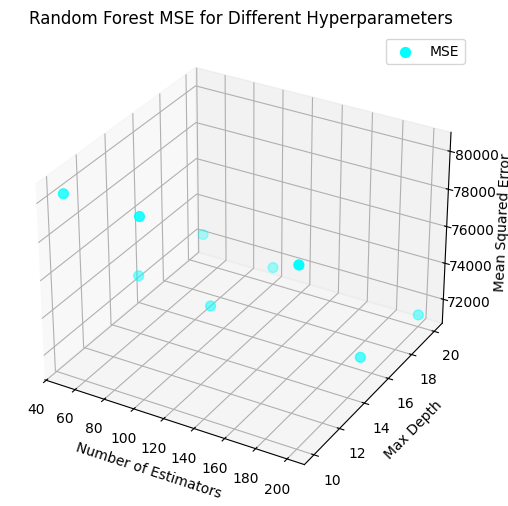

In [30]:
#visualization
rf_n_estimators_vals,rf_max_depth_vals,mse_vals,rmse_vals,r2_vals=zip(*rf_tuning_results)

fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(111,projection="3d")

ax.scatter(rf_n_estimators_vals,rf_max_depth_vals,mse_vals,c="cyan",marker="o",s=50,label="MSE")
ax.set_xlabel("Number of Estimators")
ax.set_ylabel("Max Depth")
ax.set_zlabel("Mean Squared Error")
plt.title("Random Forest MSE for Different Hyperparameters")
plt.legend()
plt.show()

The Random Forest model turned out to be the most adequate for this dataset, offering the best tradeoff between accuracy and robustness. Linear Regression and KNN serve merely as a simple baseline. Due to their assumptions and simplicity in structure, they cannot provide good models. Support Vector Machine was promising after tuning but computationally intensive. Decision Tree was effective but careful tuning was needed in order not to result in overfitting.  
In this pipeline, i explored several machine learning models, tuned their hyperparameters, and evaluated their performance using metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² score. Each model, from Linear Regression to Random Forest, was tested to determine its suitability for predicting energy production based on weather and temporal data.<br>
Support Vector Machines (SVM) with the RBF kernel struggled with the size of the dataset, requiring downsampling to prevent excessive runtime. Even after tuning, the SVM model underperformed and was not computationally efficient, making it less suitable for large datasets in this context. The Random Forest model, while performing well, is also computationally expensive, particularly with large n_estimators. For large-scale production deployment, this could present a bottleneck in terms of time and resource consumption. Linear Regression exhibited relatively poor performance due to its inability to capture non-linear relationships in the data. Although simple and interpretable, it failed to model the complexities inherent in energy production, which depends on both linear and non-linear interactions between features.<br>
The models predictions can be integrated into scheduling systems to align energy production with demand. For example, if the model predicts low production due to weather conditions, the company can preemptively source alternative energy or schedule maintenance during periods of lower production.Knowing when energy production will peak or drop based on weather conditions allows the business to better allocate energy storage resources, reduce waste, and plan distribution to consumers or the grid efficiently.<br>
While the current feature set performed well, further exploration of feature interactions and weather forecasts could enhance the model's predictive power. Features such as future weather predictions, wind direction, and solar radiation could be integrated.<br>


References<br>
Hong, T., Pinson, P. and Fan, S., 2016. Global energy forecasting competition 2012 and beyond. International Journal of Forecasting, 32(3), pp.944-948.<br>
International Energy Agency (IEA), 2020. Renewables 2020: Analysis and forecast to 2025. IEA.<br>
Sahin, S., 2020. Importance of accurate forecasting in renewable energy sources. Journal of Renewable and Sustainable Energy, 12(2), p.023103.